### Phase 5 (Evaluation)


Overall, all the models we used predicted daily energy consumption fairly well, as they stay close to the target value. With the exception of the LSTM model, the models we used were regression-based machine learning models and are well suited to this numerical prediction task, which does not involve many categorical variables or other complex structures. However, there were some differences in the performance of the models. This could be due to several factors, such as the characteristics of the data, the suitability of the model to the problem to be predicted, or the adjustments of the hyperparameters. For example, the Gradient Boosting Regressor and Random Forest Regressor are decision tree based models with many hyperparameters that could be optimised to improve their performance significantly. We did not scale the data we used at all because the models perform better without it. Plots of the results and summary model-specific estimates can be found below.


### LSTM (Long Short-Term Memory) 
Best results. However, this model is cautious in its predictions and sometimes predicts slightly lower values than the actual values. This may be because the model tries to avoid large errors that can occur if it overestimates the true values.

### XGBoost
Second best results. Generally good predictions and close to the target value. The model is very close to the performance of the LSTM model, but generally does not exceed the target.

### GBR (Gradient Boosting Regressor)
Gives good predictions and performs consistently, but generally slightly overestimates energy consumption.

### RFR (Random Forest Regressor)
Predictions are fairly accurate, close to the target value. Performs reasonably well, but like GBR, tends to overestimate energy consumption.

### LR (Linear Regression)
Gives good results, but may be sensitive to assumptions of linearity. It also tends to slightly underestimate consumption.

### SVM (Support Vector Machine)
Consistent results, but it did not match the performance of the other models in this forecasting exercise. It also underestimates energy consumption.

### KNN (K-Nearest Neighbors)
Performance varies drastically and in some cases the results are clearly inferior to others. This model overestimates energy consumption by a large margin.

In [1]:
# Suppress warnings 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Start further evaluation by loading the results to a dataframe
1. ensure 'day' is in datetime-format
2. set index as 'day'

In [3]:
results = pd.read_csv('../results.csv')
results['day'] = pd.to_datetime(results['day'])
results.set_index('day', inplace=True)

results

,target,lstm,xg,GBR,rfr,lr,svm,knn
day,,,,,,,,
2014-02-01,11.710582,11.309496,11.549168,12.660821,12.359831,12.239053,12.172883,12.691905
2014-02-02,12.078164,11.198376,11.367257,12.028142,12.059155,12.065808,12.074293,11.583873
2014-02-03,11.280011,11.448615,11.529955,13.026827,12.383803,12.533207,12.565125,12.145370
2014-02-04,11.095584,11.413491,11.549168,12.888169,12.684252,12.374260,12.459553,12.568560
2014-02-05,11.415105,11.430744,11.549168,12.518305,12.885757,12.505935,12.749924,12.397262
2014-02-06,11.445403,11.358292,11.367257,12.346181,12.537211,12.449499,12.586663,12.582898
2014-02-07,10.972318,11.473347,11.549168,12.547330,12.648316,12.410264,12.500627,12.602628
2014-02-08,11.569300,11.336770,11.529955,11.997514,12.486131,12.477652,12.606104,12.630039
2014-02-09,12.202967,11.460241,11.534585,13.005788,12.435287,12.394918,12.366362,12.168650


Plot all the results to single plot

From this plot we can see that the top performing models are LSTM and XGradient Boost.

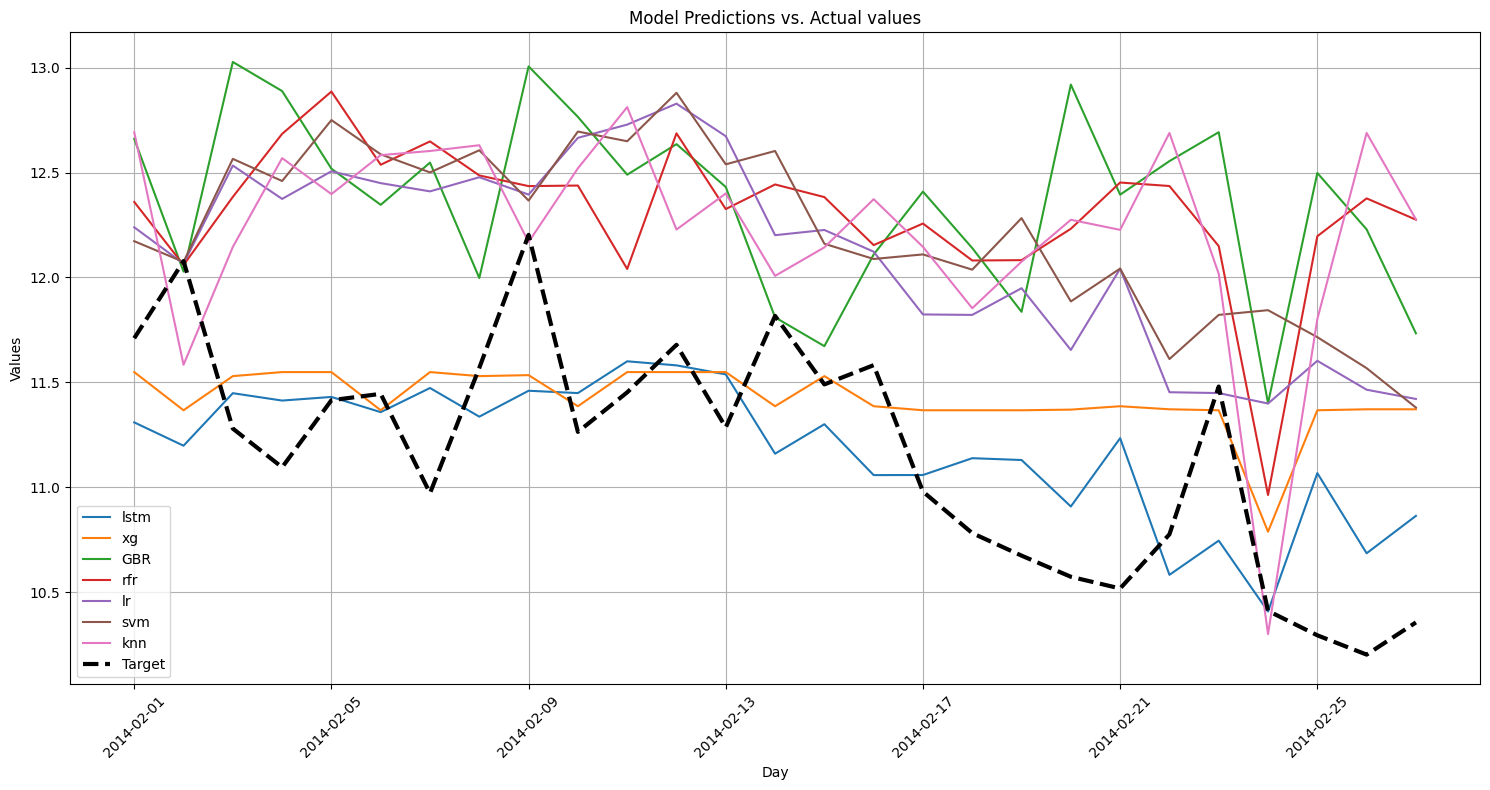

In [4]:
plt.figure(figsize=(15,8))

for column in results.columns:
    if column != 'target':
        plt.plot(results.index, results[column], label=column)

plt.plot(results.index, results['target'], label='Target', linewidth=3, linestyle='--', color='black')

plt.title('Model Predictions vs. Actual values')
plt.xlabel('Day')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Lets take a closer look at individual columns against the target value

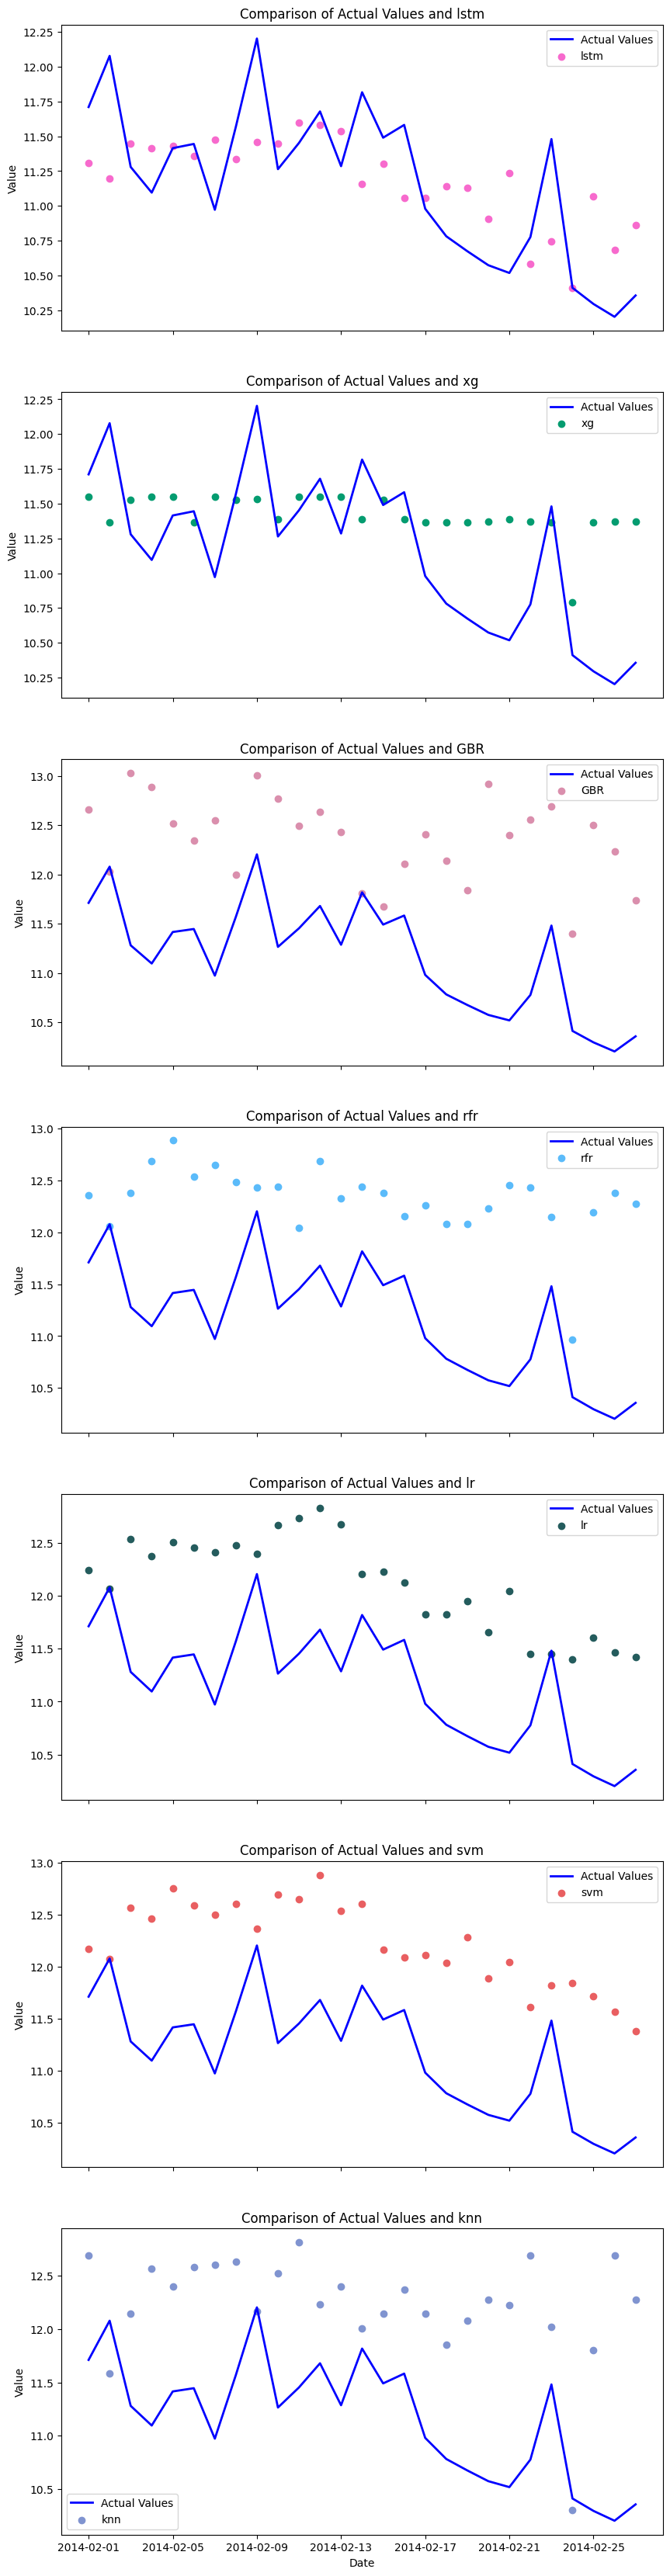

In [5]:
pred = len(results.columns) - 1
fig, axs = plt.subplots(pred, 1, figsize=(10,6 * pred), sharex=True)

if pred == 1:
    axs = [axs]

for i, pred_column in enumerate(results.columns[1:]):
    axs[i].plot(results.index, results['target'], label='Actual Values', color='blue', linewidth=2)
    axs[i].scatter(results.index, results[pred_column], color=np.random.rand(3,), label=pred_column)  # Random color for each prediction
    axs[i].set_title(f'Comparison of Actual Values and {pred_column}')
    axs[i].set_ylabel('Value')
    axs[i].legend()

plt.xlabel('Date')
plt.show()

Inspect LSTM and XGBoost results further and plot as as time-series comparison

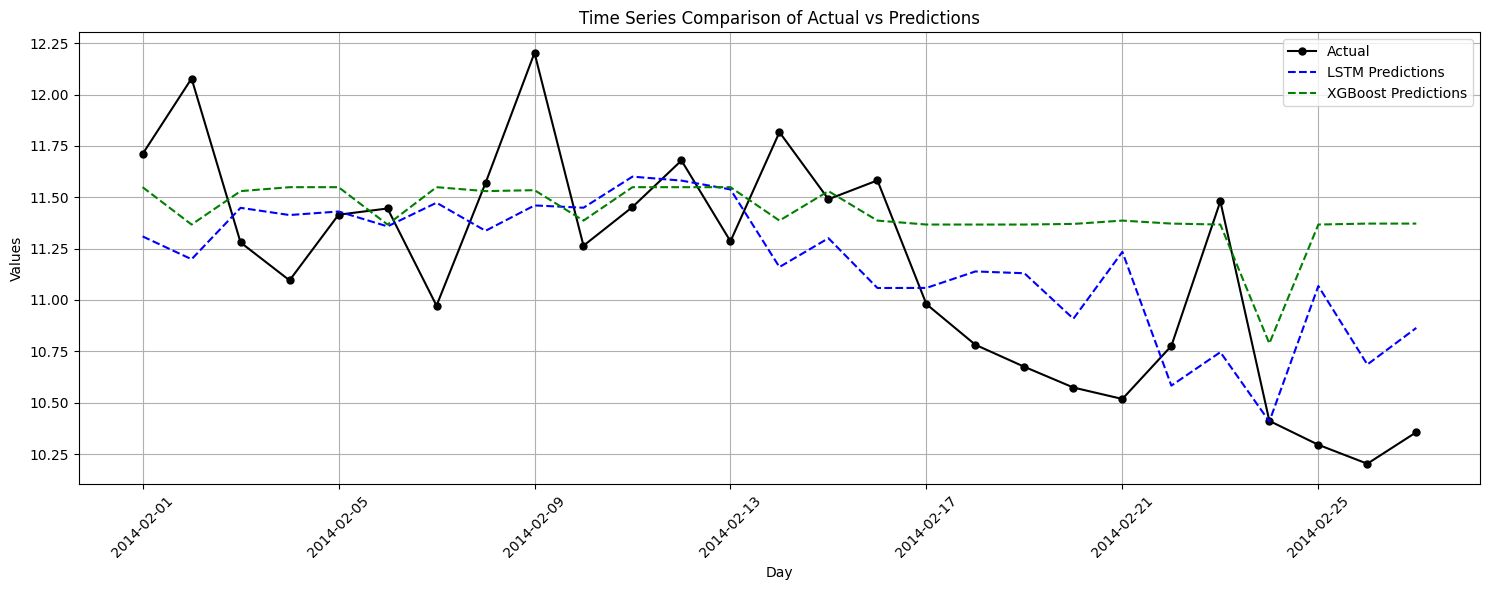

In [6]:
plt.figure(figsize=(15, 6))
plt.plot(results.index, results['target'], label='Actual', marker='o', color='black', linestyle='-', markersize=5)
plt.plot(results.index, results['lstm'], label='LSTM Predictions', color='blue', linestyle='--')
plt.plot(results.index, results['xg'], label='XGBoost Predictions', color='green', linestyle='--')
plt.title('Time Series Comparison of Actual vs Predictions')
plt.xlabel('Day')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Use scatter plot to visualize the distribution of predicted values even further

We can see that XGBoost is performing quite alot better in terms of clustered predictions

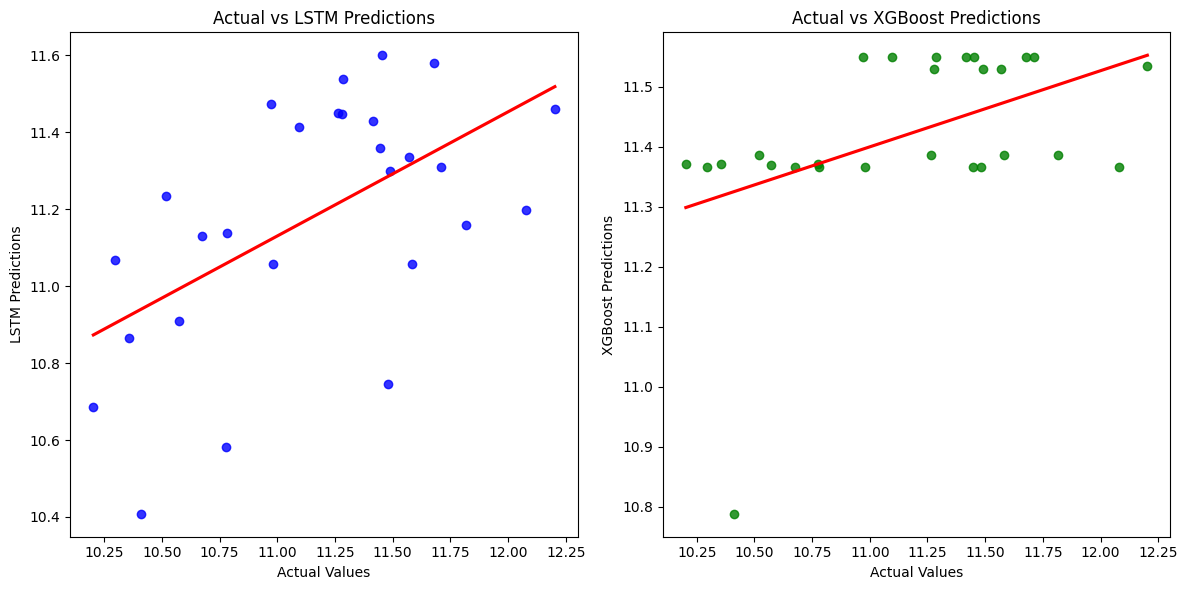

In [7]:
# Scatter plot for LSTM and XGBoost
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.regplot(x=results['target'], y=results['lstm'], ci=None, color="b", line_kws={'color': 'red'})
plt.title('Actual vs LSTM Predictions')
plt.xlabel('Actual Values')
plt.ylabel('LSTM Predictions')

plt.subplot(1, 2, 2)
sns.regplot(x=results['target'], y=results['xg'], ci=None, color="g", line_kws={'color': 'red'})
plt.title('Actual vs XGBoost Predictions')
plt.xlabel('Actual Values')
plt.ylabel('XGBoost Predictions')

plt.tight_layout()
plt.show()

Next let's visualise the results with a residual plot to show the scale of residuals in predictions

XGBoost is performing better here as well

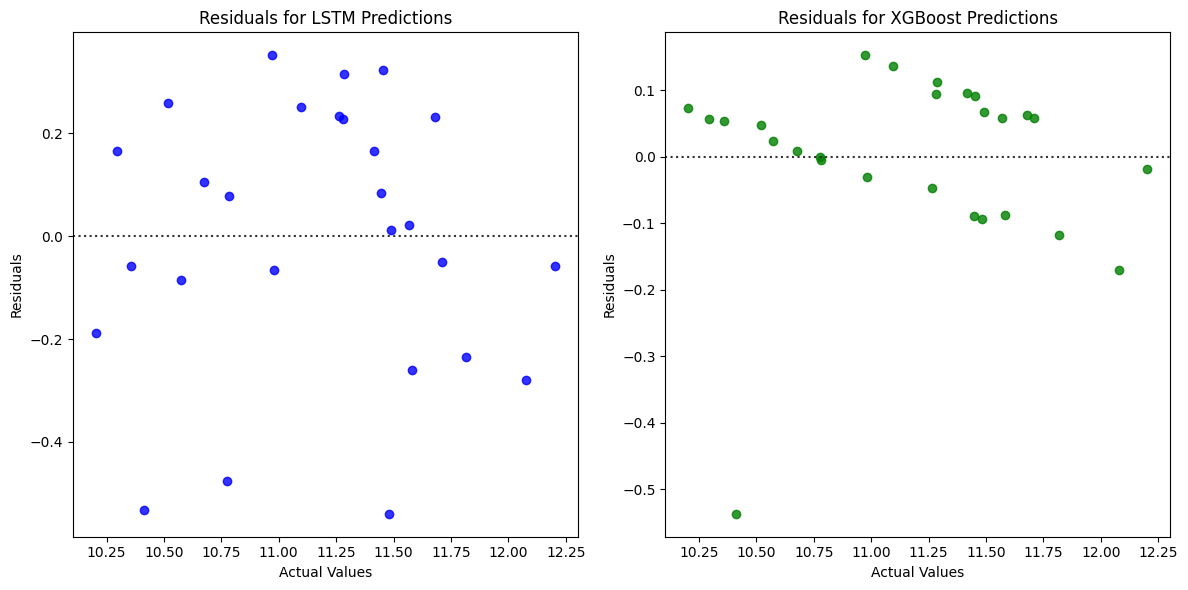

In [8]:
# residual plots

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.residplot(x=results['target'], y=results['lstm'], color="blue")
plt.title('Residuals for LSTM Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
sns.residplot(x=results['target'], y=results['xg'], color="green")
plt.title('Residuals for XGBoost Predictions')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

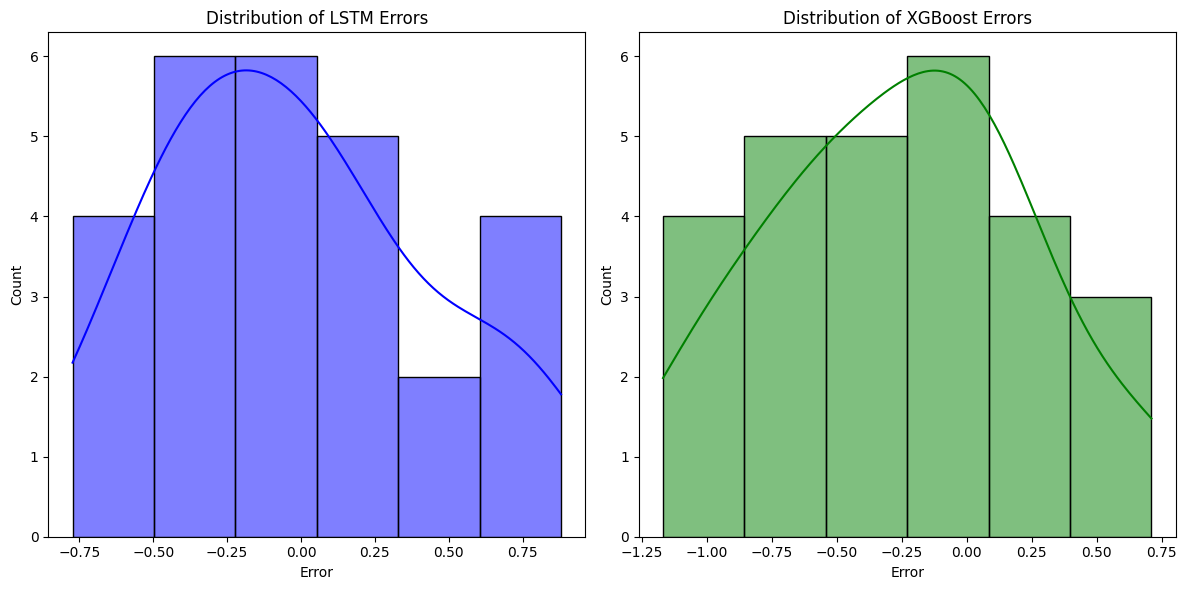

In [9]:
# Calculating errors
results['lstm_error'] = results['target'] - results['lstm']
results['xg_error'] = results['target'] - results['xg']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(results['lstm_error'], kde=True, color="blue")
plt.title('Distribution of LSTM Errors')
plt.xlabel('Error')

plt.subplot(1, 2, 2)
sns.histplot(results['xg_error'], kde=True, color="green")
plt.title('Distribution of XGBoost Errors')
plt.xlabel('Error')

plt.tight_layout()
plt.show()

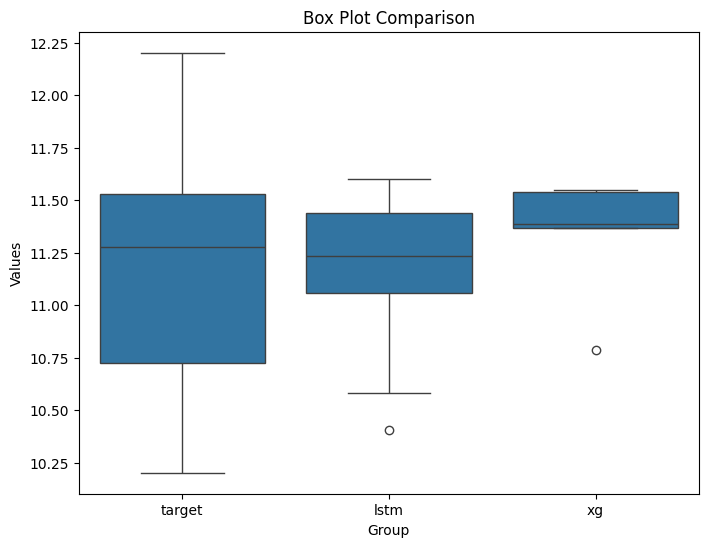

In [10]:

# Prepare data for boxplot
boxplot_data = results[['target', 'lstm', 'xg']]
boxplot_data = boxplot_data.melt(var_name='Group', value_name='Value')

plt.figure(figsize=(8, 6))
sns.boxplot(x='Group', y='Value', data=boxplot_data)
plt.title('Box Plot Comparison')
plt.xlabel('Group')
plt.ylabel('Values')
plt.show()
